# 🚀 Engine Performance Analysis – Baseline 0-D Turbofan Model
**Author:** Maxon Ericsson  
**Project:** Ultra-Lightweight Adaptive Cycle Engine – Phase 2  
**File:** `Engine_Performance.ipynb`

This notebook evaluates thermodynamic performance of the baseline 0-D turbofan engine model.  
It generates:

- Thermodynamic station outputs (T2–T5, P2–P5)
- Thrust + Specific Impulse (Isp)
- Sensitivity analyses:
  - Thrust vs Ambient Temperature
  - Isp vs Ambient Temperature
  - Thrust vs Compressor Pressure Ratio
  - Isp vs Compressor Pressure Ratio
- Validation-quality, labeled plots suitable for Phase 2 deliverables

This notebook serves as **thermodynamic documentation of the baseline engine model**, required for Phase-2.

In [2]:
import os
import sys

# ---------------------------------------------------------
# Ensure Python can see the project src/ directory
# ---------------------------------------------------------
project_root = os.getcwd()        # Folder where notebook lives
src_path = os.path.join(project_root, "src")

if src_path not in sys.path:
    sys.path.append(src_path)

# Import the integrated engine model
from engine_model import EngineModel

# Standard libraries
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


In [3]:
# Baseline 0-D turbofan engine object
engine = EngineModel(
    mass_flow=50.0,         # kg/s
    compressor_PR=18.0,     # overall pressure ratio
    compressor_eff=0.88,
    turbine_eff=0.90,
    f=0.020                 # fuel–air ratio
)

engine


In [4]:
# Standard sea-level conditions
T_ambient = 288.15     # K
P_ambient = 101325     # Pa

results = engine.run(T_ambient, P_ambient)
results


{'T2': 708.5064361350788,
 'P2': 1823850.0,
 'T3': 1555.6706152395566,
 'P3': 1769134.5,
 'T4': 1088.6079084228022,
 'P4': 419640.91887728794,
 'T5': 907.1732570190019,
 'P5': 221688.65482377133,
 'V_exit': 603.7401880529694,
 'M_exit': 1.0,
 'thrust_N': 30187.00940264847,
 'specific_impulse_s': 3077.1671154585592,
 'fuel_flow_kg_s': 1.0}

In [5]:
print("=== Baseline Engine Performance ===\n")

for key, value in results.items():
    print(f"{key:25s} : {value:12.4f}")


=== Baseline Engine Performance ===

T2                        :     708.5064
P2                        : 1823850.0000
T3                        :    1555.6706
P3                        : 1769134.5000
T4                        :    1088.6079
P4                        :  419640.9189
T5                        :     907.1733
P5                        :  221688.6548
V_exit                    :     603.7402
M_exit                    :       1.0000
thrust_N                  :   30187.0094
specific_impulse_s        :    3077.1671
fuel_flow_kg_s            :       1.0000


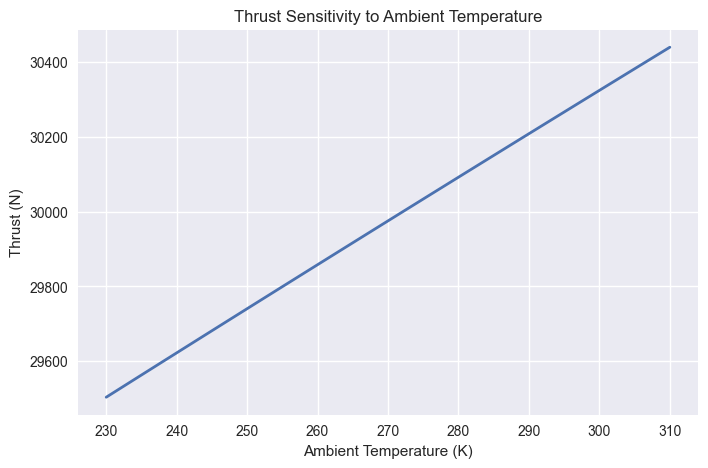

In [6]:
temps = np.linspace(230, 310, 20)   # K
thrusts = []

for T in temps:
    out = engine.run(T, P_ambient)
    thrusts.append(out["thrust_N"])

plt.figure(figsize=(8,5))
plt.plot(temps, thrusts, linewidth=2)
plt.xlabel("Ambient Temperature (K)")
plt.ylabel("Thrust (N)")
plt.title("Thrust Sensitivity to Ambient Temperature")
plt.grid(True)
plt.show()


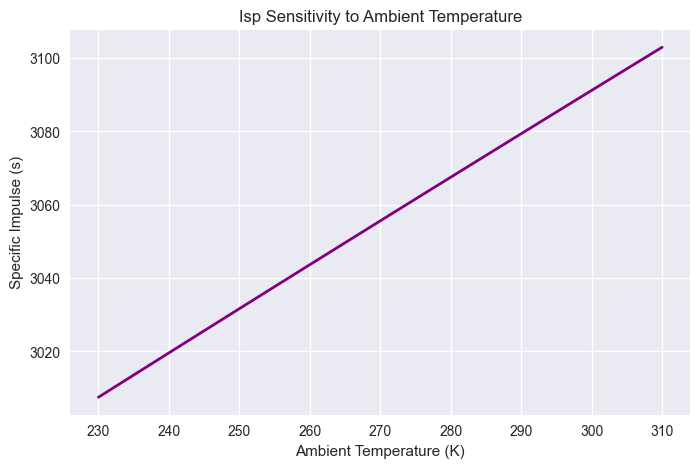

In [7]:
isps = [engine.run(T, P_ambient)["specific_impulse_s"] for T in temps]

plt.figure(figsize=(8,5))
plt.plot(temps, isps, linewidth=2, color="purple")
plt.xlabel("Ambient Temperature (K)")
plt.ylabel("Specific Impulse (s)")
plt.title("Isp Sensitivity to Ambient Temperature")
plt.grid(True)
plt.show()
